In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

Please Download and Run on local Environment for all Renders
The following report contains information about 
1.Global EV Stocks and Sales
2.Region Wise Reports 
3.Electrcity Demand
4.Different Powertrains. 


In [2]:
data = pd.read_csv(r"C:\Users\anasw\OneDrive\Desktop\Analyst datasets\IEA Global EV Data 2024.csv")
df = pd.DataFrame(data)

df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [4]:
df.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [42]:
# Different KPIs in the dataset
modes = df["mode"].unique()
params = df["parameter"].unique()
print(modes)
print(params)

['Cars' 'EV' 'Buses' 'Vans' 'Trucks']
['EV stock share' 'EV sales share' 'EV sales' 'EV stock'
 'EV charging points' 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']


In [16]:
#fILTER DATA FOR EV STOCK SHARE
df_stock_share = df[df["parameter"] == "EV stock share"]

df_stock_share

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
7,Australia,Historical,EV stock share,Cars,EV,2012,percent,0.00240
12,Australia,Historical,EV stock share,Cars,EV,2013,percent,0.00460
19,Australia,Historical,EV stock share,Cars,EV,2014,percent,0.01400
24,Australia,Historical,EV stock share,Cars,EV,2015,percent,0.02700
...,...,...,...,...,...,...,...,...
12643,World,Projection-APS,EV stock share,Trucks,EV,2035,percent,11.00000
12646,World,Projection-STEPS,EV stock share,Buses,EV,2035,percent,20.00000
12648,World,Projection-STEPS,EV stock share,Vans,EV,2035,percent,18.00000
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,31.00000


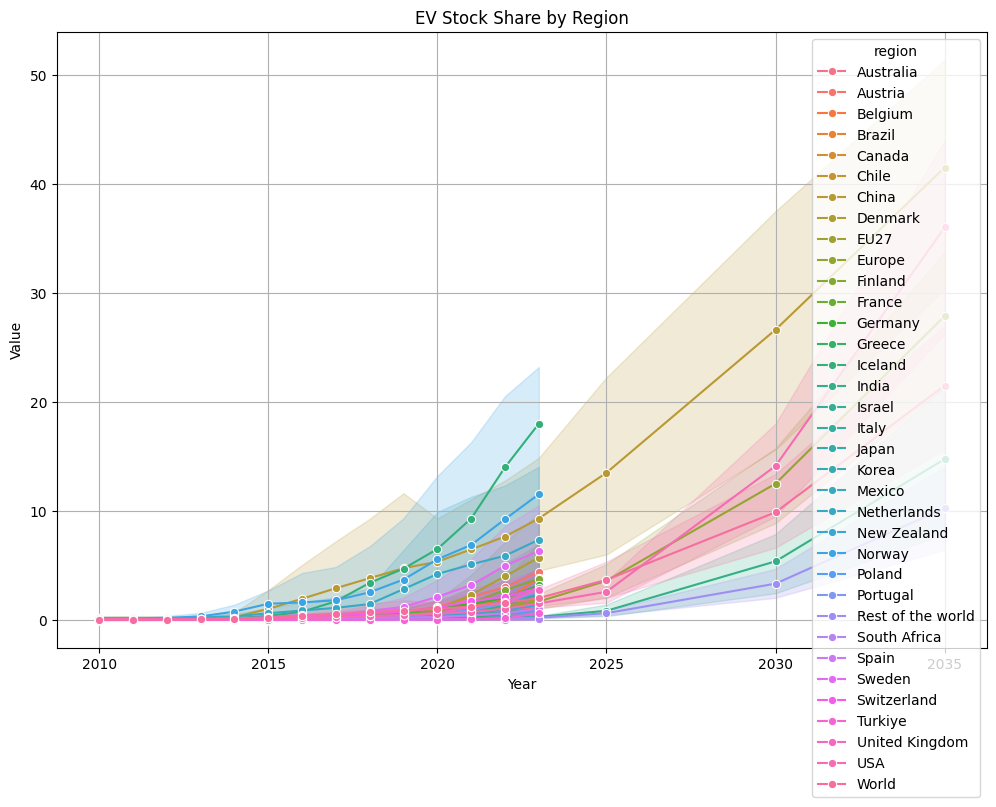

In [27]:
plt.figure(figsize=(12,8))
sns.lineplot(x="year", y="value", hue="region", data=df_stock_share, marker = "o")
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(True)
plt.title("EV Stock Share by Region")
plt.show()

In [21]:
#FILTER DATA FOR EV SALES SHARE
df_sales_share = df[df["parameter"] == "EV sales share"]
df_sales_share

,region,category,parameter,mode,powertrain,year,unit,value
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.0065
6,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.0300
13,Australia,Historical,EV sales share,Cars,EV,2013,percent,0.0340
18,Australia,Historical,EV sales share,Cars,EV,2014,percent,0.1600
25,Australia,Historical,EV sales share,Cars,EV,2015,percent,0.2000
...,...,...,...,...,...,...,...,...
12641,World,Projection-APS,EV sales share,Cars,EV,2035,percent,68.0000
12644,World,Projection-STEPS,EV sales share,Vans,EV,2035,percent,41.0000
12645,World,Projection-STEPS,EV sales share,Trucks,EV,2035,percent,22.0000
12647,World,Projection-STEPS,EV sales share,Buses,EV,2035,percent,29.0000


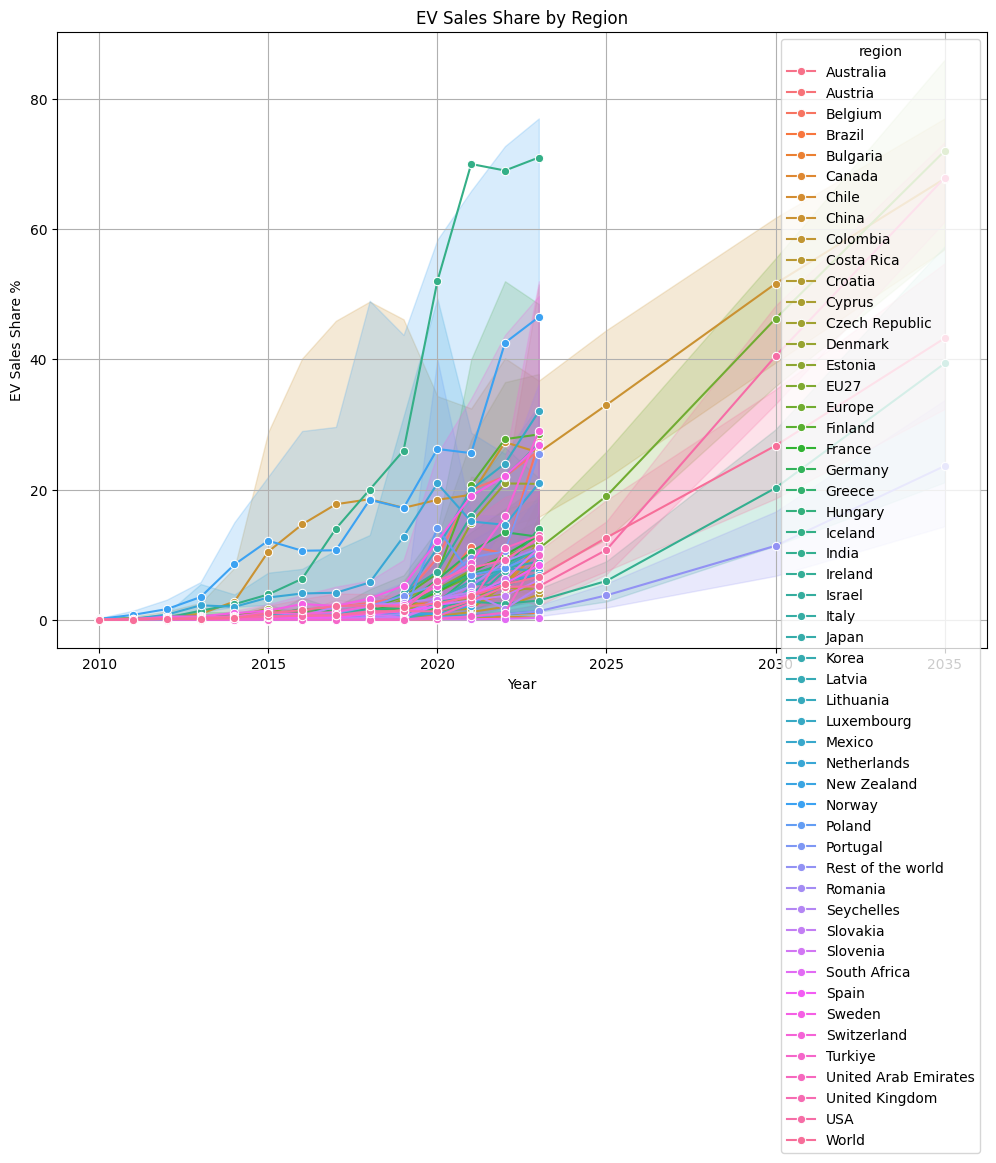

In [26]:
plt.figure(figsize=(12,8))
sns.lineplot(x = df_sales_share["year"] , y = df_sales_share["value"] , hue = df_sales_share["region"] , marker= "o")
plt.xlabel("Year")
plt.ylabel("EV Sales Share %")
plt.grid(True)
plt.title("EV Sales Share by Region")
plt.show()

In [31]:
plt.figure(figsize=(12,8))
fig = px.bar(df_stock_share, x="year", y="value", color="mode" , title="EV Stock Share by Mode and Region")
fig.show()

<Figure size 1200x800 with 0 Axes>

In [32]:
plt.figure(figsize=(12,8))
fig = px.bar(df_sales_share, x="year", y="value", color="mode" , title="EV Sales Share by Mode and Region")
fig.show()

<Figure size 1200x800 with 0 Axes>

In [40]:
df_sales_share.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1642 entries, 1 to 12649
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      1642 non-null   object 
 1   category    1642 non-null   object 
 2   parameter   1642 non-null   object 
 3   mode        1642 non-null   object 
 4   powertrain  1642 non-null   object 
 5   year        1642 non-null   int64  
 6   unit        1642 non-null   object 
 7   value       1642 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 115.5+ KB


In [46]:
#FILTER DATA FOR EV STOCK
df_ev_stock = df[df["parameter"] == "EV stock"]
df_ev_stock

,region,category,parameter,mode,powertrain,year,unit,value
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.0
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.0
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.0
11,Australia,Historical,EV stock,Cars,PHEV,2013,Vehicles,180.0
15,Australia,Historical,EV stock,Cars,BEV,2013,Vehicles,410.0
...,...,...,...,...,...,...,...,...
12631,World,Projection-STEPS,EV stock,Vans,FCEV,2035,Vehicles,980000.0
12632,World,Projection-STEPS,EV stock,Vans,PHEV,2035,Vehicles,1400000.0
12633,World,Projection-STEPS,EV stock,Cars,BEV,2035,Vehicles,390000000.0
12634,World,Projection-STEPS,EV stock,Cars,FCEV,2035,Vehicles,1200000.0


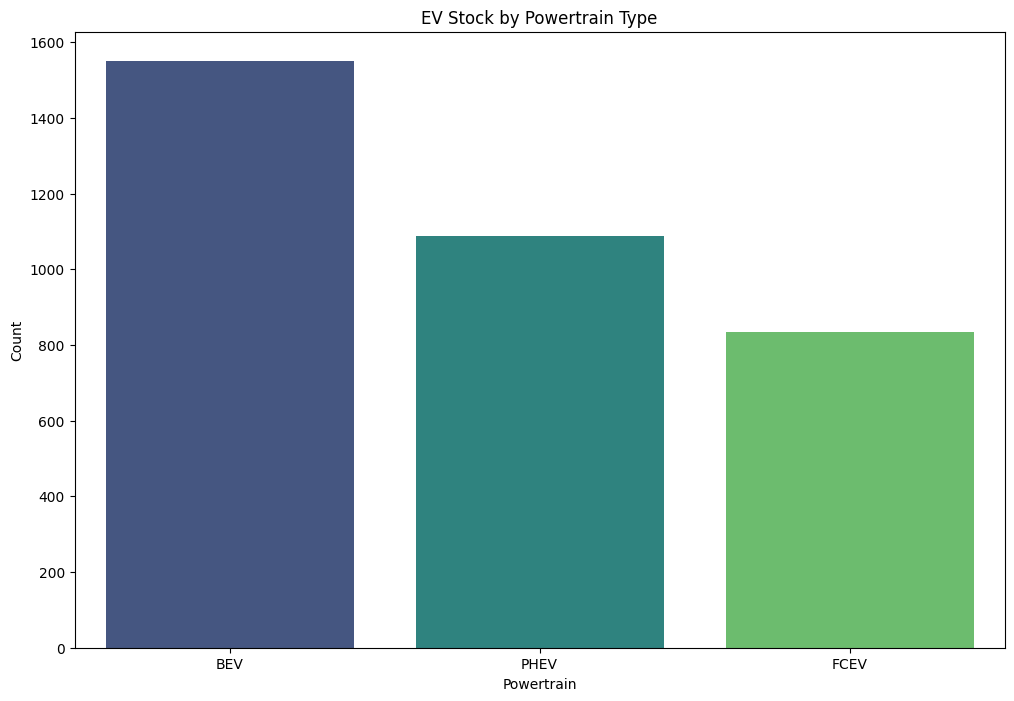

In [69]:
powertrains = df_ev_stock["powertrain"].value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=powertrains.index, y=powertrains.values ,  hue = powertrains.index , palette="viridis")
plt.xlabel("Powertrain")
plt.ylabel("Count")
plt.title("EV Stock by Powertrain Type")
plt.show()

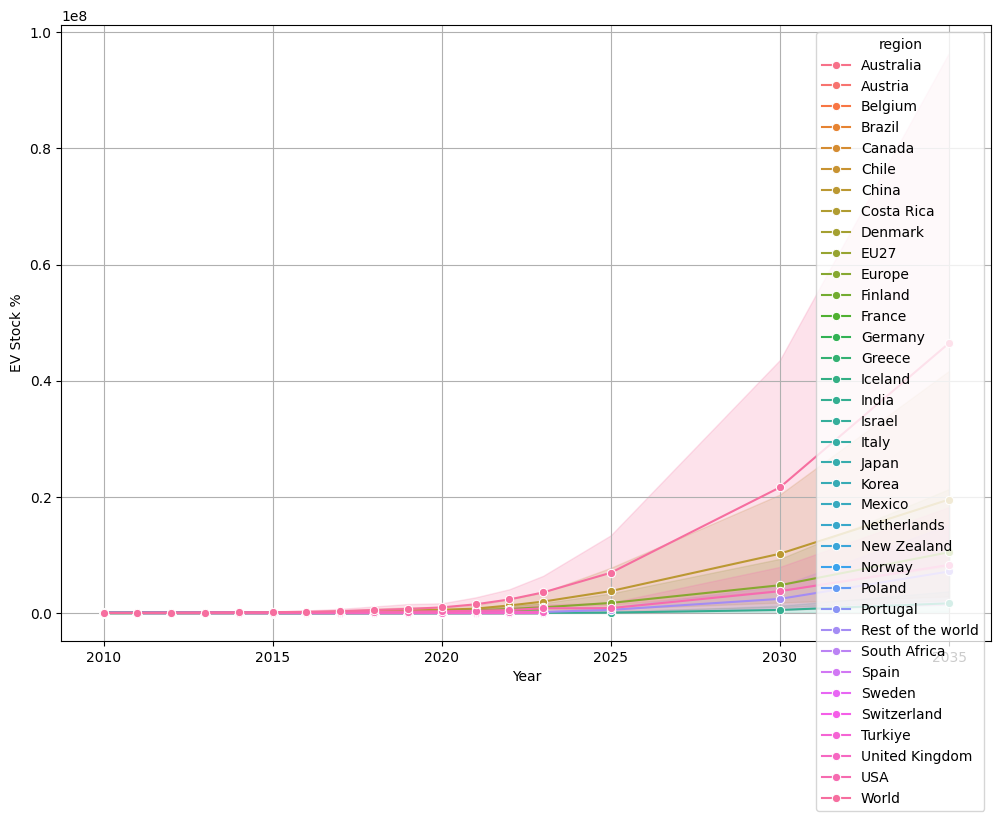

In [80]:
plt.figure(figsize=(12,8))
sns.lineplot(x="year", y="value", hue="region", data=df_ev_stock, marker = "o")
plt.xlabel("Year")
plt.ylabel("EV Stock %")
plt.grid(True)
plt.show()

In [89]:
plt.figure(figsize=(12,8))
fig = px.bar(df_ev_stock,x="year", y="region", color="mode" , title="EV Stock by Mode and Region")
fig.show()

<Figure size 1200x800 with 0 Axes>

In [90]:
#Filter data for EV sales
df_ev_sales = df[df["parameter"] == "EV sales"]
df_ev_sales

,region,category,parameter,mode,powertrain,year,unit,value
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0
9,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80.0
10,Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,100.0
14,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190.0
...,...,...,...,...,...,...,...,...
12619,World,Projection-STEPS,EV sales,Vans,FCEV,2035,Vehicles,170000.0
12620,World,Projection-STEPS,EV sales,Vans,PHEV,2035,Vehicles,150000.0
12621,World,Projection-STEPS,EV sales,Cars,BEV,2035,Vehicles,51000000.0
12622,World,Projection-STEPS,EV sales,Cars,FCEV,2035,Vehicles,200000.0


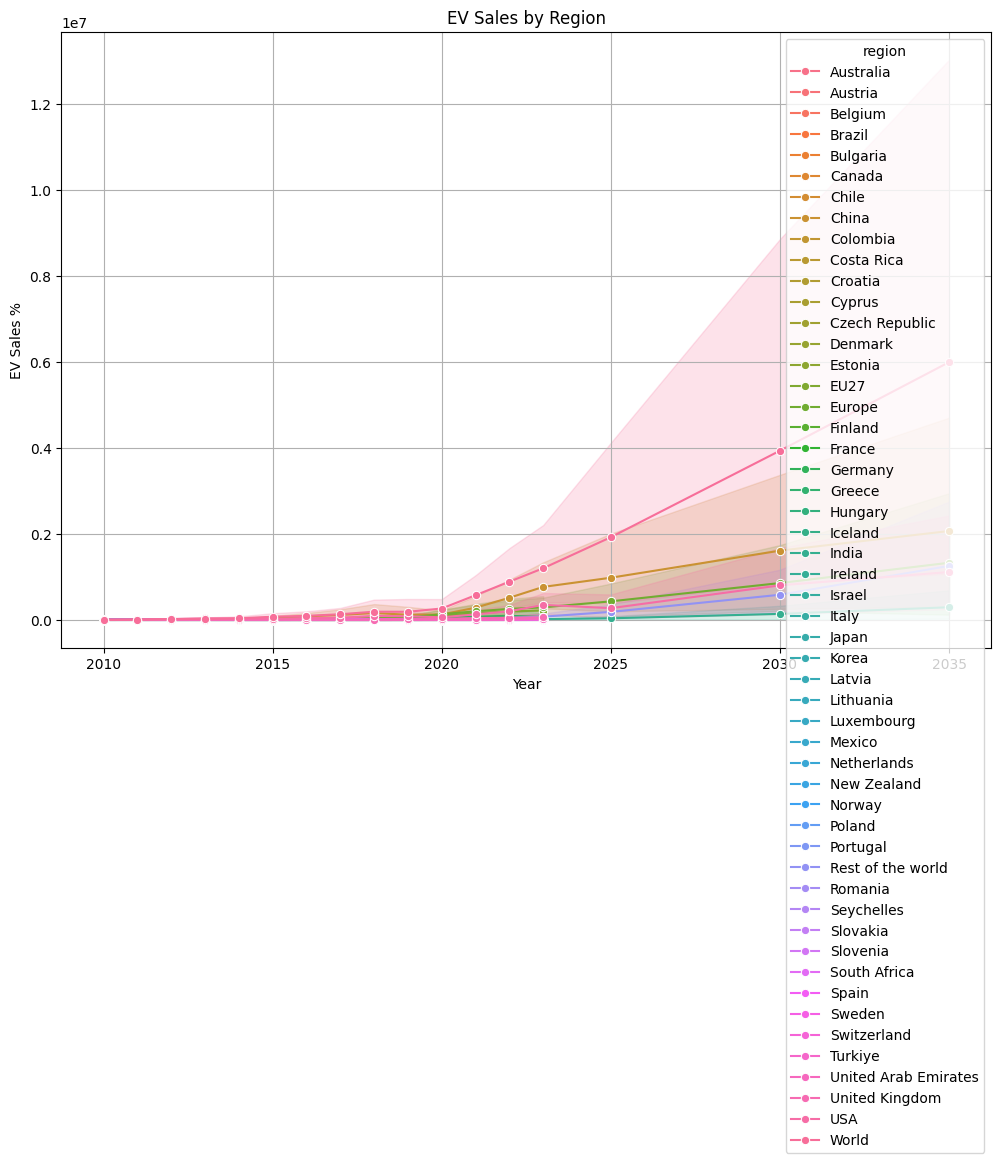

In [92]:
plt.figure(figsize=(12,8))
sns.lineplot(x="year", y="value", hue="region", data=df_ev_sales, marker = "o")
plt.xlabel("Year")
plt.ylabel("EV Sales %")
plt.grid(True)
plt.title("EV Sales by Region")
plt.show()

In [102]:
sl_ev = df_ev_sales.groupby("region")["value"].sum()

fig = px.bar(x = sl_ev.index , y = sl_ev.values , color = sl_ev.index , title = "EV Sales by Region" , labels={"x": "Region", "y": "EV Sales"})
fig.show()

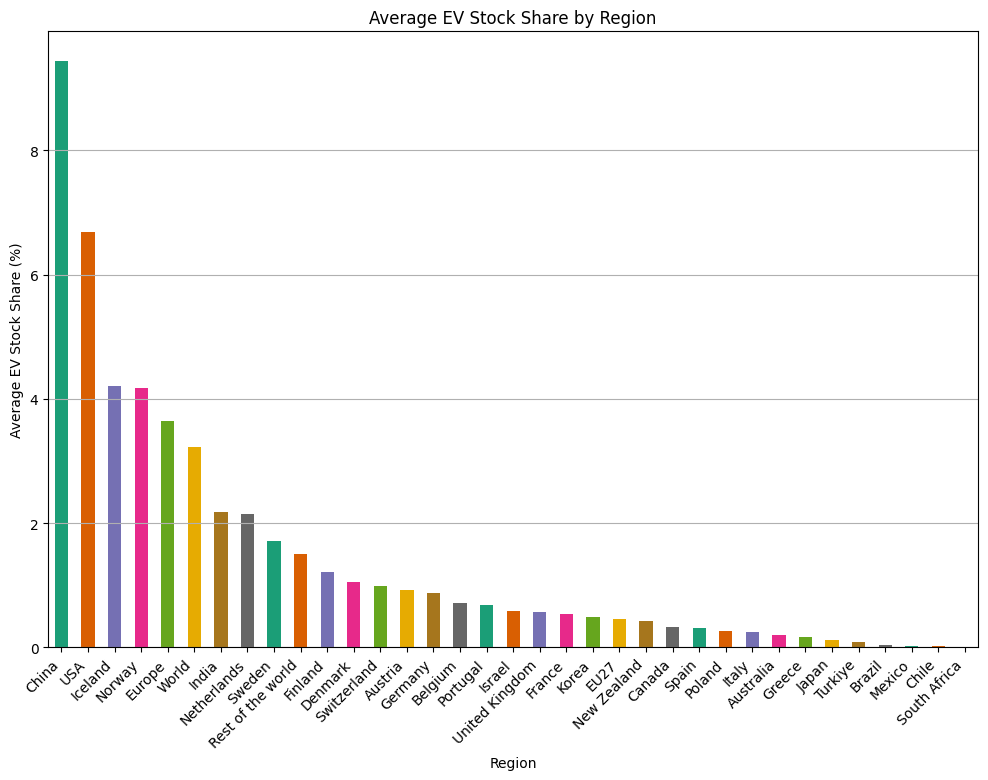

In [103]:
ev_stock_share = df[df['parameter'] == 'EV stock share']

# Calculate average EV stock share by region
average_ev_stock_share_by_region = ev_stock_share.groupby('region')['value'].mean().sort_values(ascending=False)

# Plot average EV stock share by region
plt.figure(figsize=(12, 8))
average_ev_stock_share_by_region.plot(kind='bar', color=plt.get_cmap('Dark2').colors)
plt.title('Average EV Stock Share by Region')
plt.xlabel('Region')
plt.ylabel('Average EV Stock Share (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

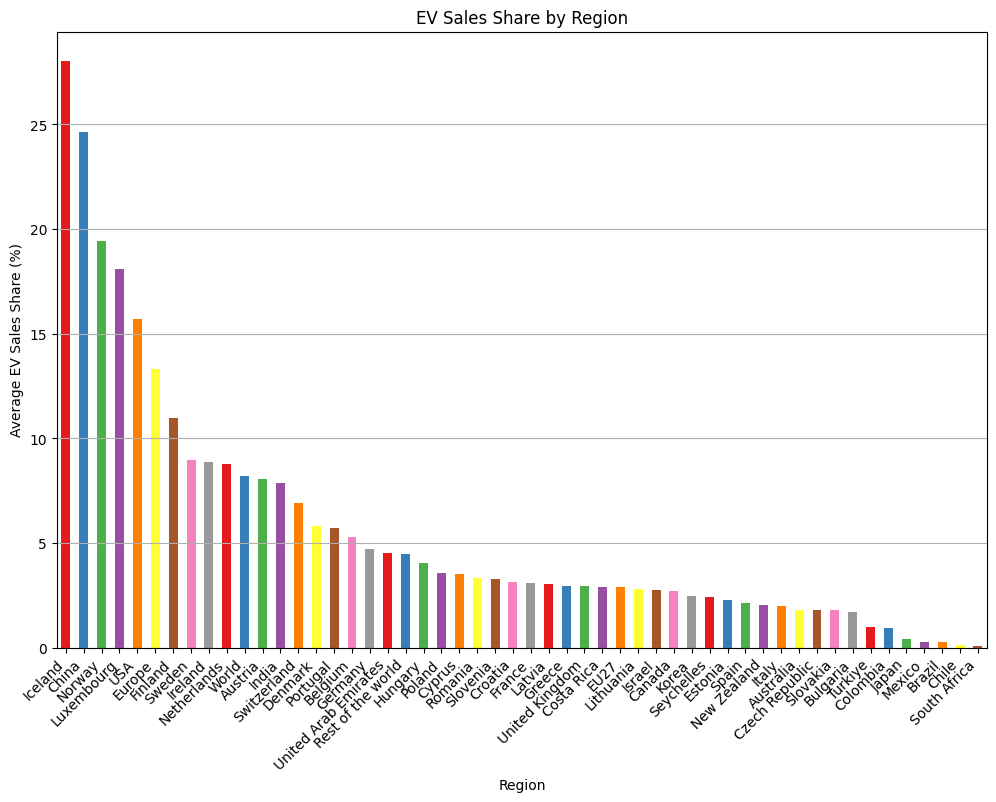

In [106]:
# Filter data for EV sales share
ev_sales_share = df[df['parameter'] == 'EV sales share']

# Aggregate EV sales share by region
ev_sales_share_by_region = ev_sales_share.groupby('region')['value'].mean().sort_values(ascending=False)

# Plot EV sales share by region
plt.figure(figsize=(12, 8))
ev_sales_share_by_region.plot(kind='bar', color=plt.get_cmap('Set1').colors)
plt.title('EV Sales Share by Region')
plt.xlabel('Region')
plt.ylabel('Average EV Sales Share (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In [112]:
df_charging_points = df[df["parameter"] == "EV charging points"]
df_charging_points


,region,category,parameter,mode,powertrain,year,unit,value
38,Australia,Historical,EV charging points,EV,Publicly available fast,2017,charging points,40.0
39,Australia,Historical,EV charging points,EV,Publicly available slow,2017,charging points,440.0
44,Australia,Historical,EV charging points,EV,Publicly available fast,2018,charging points,61.0
45,Australia,Historical,EV charging points,EV,Publicly available slow,2018,charging points,670.0
54,Australia,Historical,EV charging points,EV,Publicly available slow,2019,charging points,1700.0
...,...,...,...,...,...,...,...,...
12537,World,Projection-STEPS,EV charging points,EV,Publicly available slow,2030,charging points,9100000.0
12586,World,Projection-STEPS,EV charging points,EV,Publicly available fast,2035,charging points,9200000.0
12587,World,Projection-STEPS,EV charging points,EV,Publicly available slow,2035,charging points,14000000.0
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9400000.0


In [117]:
charging_points = df_charging_points.groupby("region")["value"].sum()

In [119]:
plt.figure(figsize=(12,8))
fig = px.bar(x = charging_points.index , y = charging_points.values , color = charging_points.index , title = "EV Charging Points by Region" , labels={"x": "Region", "y": "EV Charging Points"})
fig.show()

<Figure size 1200x800 with 0 Axes>

In [123]:
charging_type = df_charging_points.groupby("powertrain")["value"].sum()

plt.figure(figsize=(12,8))
fig = px.bar(x = charging_type.index , y = charging_type.values , color = charging_type.index , title = "EV Charging Points by Mode" , labels={"x": "Mode", "y": "EV Charging Points"})
fig.show()

<Figure size 1200x800 with 0 Axes>

In [126]:
electricity_demand = df[df["parameter"] == "Electricity demand"]


In [127]:
electricity_demand

,region,category,parameter,mode,powertrain,year,unit,value
1071,China,Historical,Electricity demand,Buses,EV,2010,GWh,150.0
1072,China,Historical,Electricity demand,Vans,EV,2010,GWh,3.0
1073,China,Historical,Electricity demand,Cars,EV,2010,GWh,46.0
1120,China,Historical,Electricity demand,Buses,EV,2011,GWh,110.0
1121,China,Historical,Electricity demand,Vans,EV,2011,GWh,2.5
...,...,...,...,...,...,...,...,...
12573,World,Projection-APS,Electricity demand,Cars,EV,2035,GWh,1600000.0
12582,World,Projection-STEPS,Electricity demand,Buses,EV,2035,GWh,130000.0
12583,World,Projection-STEPS,Electricity demand,Trucks,EV,2035,GWh,410000.0
12584,World,Projection-STEPS,Electricity demand,Vans,EV,2035,GWh,170000.0


In [132]:
plt.figure(figsize=(12,8))
fig = px.bar(electricity_demand, x="year", y="value", color="region" , title="Electricity Demand by Region" , labels={"value": "Electricity Demand"})
fig.show()

<Figure size 1200x800 with 0 Axes>